In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import graph


In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
        
_set_env("LANGCHAIN_TRACING_V2")
_set_env("LANGCHAIN_ENDPOINT")
_set_env("LANGCHAIN_API_KEY")   
_set_env("LANGCHAIN_PROJECT")
_set_env("OPENAI_API_KEY")



In [11]:
output = await graph.ainvoke({"messages": [("user", "Multiply 2 and 3 together and then once that is done search the web for if that number is a prime number")]})

for m in output['messages'][-1:]:
        m.pretty_print()


hi


2024-10-11 10:06:38,921 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-10-11 10:06:38,926 - INFO - content='' additional_kwargs={'tool_calls': [{'id': 'call_EAoHXo61lzvpIvncECFGD48e', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 234, 'total_tokens': 251, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e2bde53e6e', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-e0abcaf4-f9c5-4b5e-bacd-af5f0219af93-0' tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_EAoHXo61lzvpIvncECFGD48e', 'type': 'tool_call'}] usage_metadata={'input_tokens': 234, 'output_tokens': 17, 'total_tokens': 251, 'input_token_details': {'cache_read': 0}, 

multiply
hi


2024-10-11 10:06:39,634 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-10-11 10:06:39,640 - INFO - content='' additional_kwargs={'tool_calls': [{'id': 'call_AlIpUNVJTEl38FafbbRGhwLC', 'function': {'arguments': '{"query":"Is 6 a prime number?"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 259, 'total_tokens': 278, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e2bde53e6e', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-da1e3cb3-7976-4090-8457-378bcb8833f1-0' tool_calls=[{'name': 'search', 'args': {'query': 'Is 6 a prime number?'}, 'id': 'call_AlIpUNVJTEl38FafbbRGhwLC', 'type': 'tool_call'}] usage_metadata={'input_tokens': 259, 'output_tokens': 19, 'total_tokens': 278, 'input_tok

search
hi


2024-10-11 10:06:46,603 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-10-11 10:06:46,613 - INFO - content='Verily, the product of 2 and 3 is 6. Upon mine inquiry into the nature of this number, it hath been revealed that 6 is not a prime number. \n\nForsooth, a prime number is defined as a natural number greater than 1 that can be divided only by itself and 1. Yet, the number 6 can be divided by 1, 2, 3, and 6, thus it possesseth more than two factors, rendering it a composite number. \n\nShouldst thou desire to peruse more on this matter, thou may find further explanation [here](https://www.cuemath.com/numbers/is-6-a-prime-number/).' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 145, 'prompt_tokens': 2810, 'total_tokens': 2955, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o

================================== Ai Message ==================================

Verily, the product of 2 and 3 is 6. Upon mine inquiry into the nature of this number, it hath been revealed that 6 is not a prime number. 

Forsooth, a prime number is defined as a natural number greater than 1 that can be divided only by itself and 1. Yet, the number 6 can be divided by 1, 2, 3, and 6, thus it possesseth more than two factors, rendering it a composite number. 

Shouldst thou desire to peruse more on this matter, thou may find further explanation [here](https://www.cuemath.com/numbers/is-6-a-prime-number/).


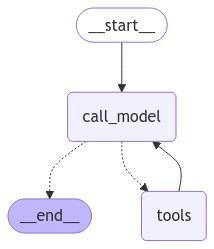

In [6]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))